# Función de Costo

L = Función de Costo (Perdida) 

$t = \text{Predictor}$

$b, m = w_0, w_1$ 


$$ L = \frac{1}{N} \sum_{i} L_{i}\left( t_{i}, f_i(x_i; w_0, w_1) \right)  = \frac{1}{N}  \sum_{i} L_{i}(t_i, w_0 + w_1 x_i)$$

$$  \hat{w_0}  = \bar{t} - \hat{w_1} \bar{x}$$

$$  \hat{w_1} = \frac{\bar{xt} - \bar{x} \bar{t}}{\bar{x²} - \bar{x}²}$$

$$ \text{argmin} \quad L(W, w_1)$$

## LS Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
data = np.loadtxt('olympic100m_men.txt', delimiter=',').T

In [29]:
x = data[0]
y = data[1]

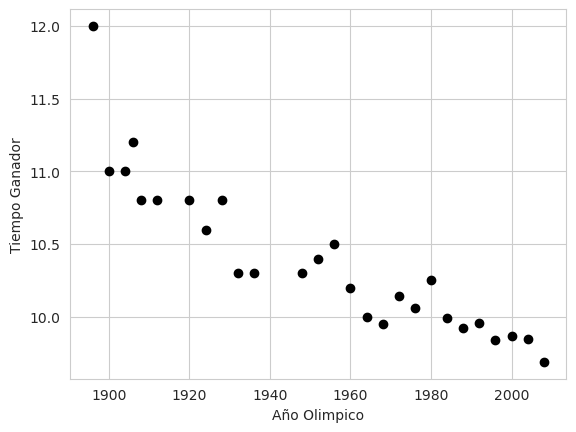

In [8]:
plt.scatter(x, y, color = 'black')
plt.xlabel('Año Olimpico')
plt.ylabel('Tiempo Ganador');

In [11]:
def w(x, y):
    xbar = x.mean()
    ybar = y.mean()
    xxbar = (x**2).mean()
    xybar = (x*y).mean()
    w1 = (xbar*ybar - xybar)/(xbar*xbar - xxbar)
    w0 = ybar - w1*xbar
    
    return w0, w1

### Usando la forma matricial


$$  \omega = (X^{T}X)^{-1} X^{T} t $$

In [69]:
def w(x, y):
    xv = x[:, np.newaxis]
    ones = np.ones(xv.shape)

    X = np.hstack((ones, xv))

    t = y[:, np.newaxis]

    #Implementamos en forma matricial, el calculo de los pesos
    w = np.linalg.inv(X.T @ X) @ X.T @ t

    w0, w1 = w[:, 0] 
    return w0, w1

b0, slope = w(x, y)

#Valores para plotear
x1 = np.linspace(np.min(x), np.max(x), 250)

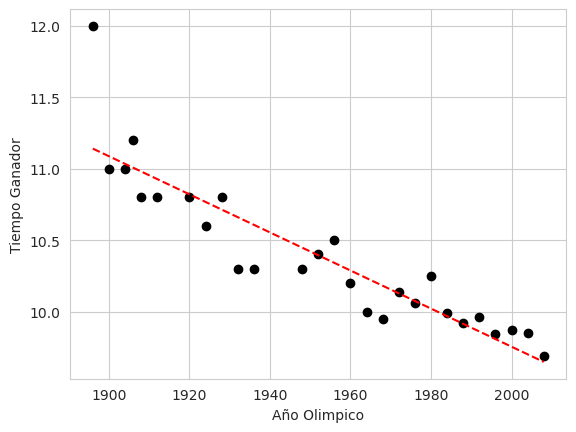

In [68]:
plt.scatter(x, y, color = 'black')
plt.plot(x1, slope*x1 + b0, ls = '--', color = 'red');
plt.xlabel('Año Olimpico')
plt.ylabel('Tiempo Ganador');

## Función hecha en clase

In [70]:
def w_mat(x, y):
    X = np.vstack((np.ones_like(x), x)).T
    t = y
    XX = np.matmul(X.T, X)
    invXX = np.linalg.inv(XX)
    Xt = np.matmul(X.T, t)
    W = np.matmul(invXX, Xt)
    
    return W


### Para ahora hacer un ajuste de esta manera

$$ f = w_0 + w_1 x + w_2x^{2}$$

In [72]:
def w_mat(x, y):
    X = np.vstack((np.ones_like(x), x, x*x)).T
    t = y
    XX = np.matmul(X.T, X)
    invXX = np.linalg.inv(XX)
    Xt = np.matmul(X.T, t)
    W = np.matmul(invXX, Xt)
    
    return W

w_mat(x, y)

array([ 4.55597855e+02, -4.43160485e-01,  1.10151552e-04])